<a href="https://colab.research.google.com/github/taskswithcode/latent-diffusion/blob/main/TWCLatentDiffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook to reproduce results of latent-diffusion**

## 1. Check GPU is available

In [2]:
!nvidia-smi

Thu Jun 23 02:36:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Download the tar file containing original repository, environment snapshot, and required models

In [4]:
!gdown 1wCa7blT4RXFNxqR_JT6yzEmo2uN-5zDi

Downloading...
From: https://drive.google.com/uc?id=1wCa7blT4RXFNxqR_JT6yzEmo2uN-5zDi
To: /content/s3cfg
100% 2.12k/2.12k [00:00<00:00, 4.36MB/s]


In [8]:
!mv .s3cfg /root/.s3cfg

In [ ]:
!apt-get install s3cmd

In [9]:
!s3cmd ls

2022-06-21 20:32  s3://repos


In [10]:
!s3cmd ls s3://repos

2022-06-23 00:21 5685170632   s3://repos/twc_taming_transformers4.tar


In [11]:
!s3cmd get s3://repos/twc_taming_transformers4.tar

download: 's3://repos/twc_taming_transformers4.tar' -> './twc_taming_transformers4.tar'  [1 of 1]
download: 's3://repos/twc_taming_transformers4.tar' -> './twc_taming_transformers4.tar'  [1 of 1]
 5685170632 of 5685170632   100% in  295s    18.33 MB/s  done


## 3. Extract from the tar file and change working directory

In [ ]:
!tar xvzf twc_taming_transformers4.tar

In [15]:
cd taming-transformers

/content/taming-transformers


## 4. Set up local environment

In [16]:
!./twc_setup.sh

./conda_envs/bin/conda-unpack
mkdir -p  $HOME/.cache/torch/hub/checkpoints
cp vgg16-397923af.pth $HOME/.cache/torch/hub/checkpoints/vgg16-397923af.pth
mkdir -p  /usr/share/fonts/truetype/liberation/
cp  LiberationSans-BoldItalic.ttf /usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf


In [17]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from IPython.display import display # to display imag

## 5a. Run sample tests within the environment, starting with replicating tests from original repository

In [18]:
!(source conda_envs/bin/activate; python twc_main.py -input 'https://heibox.uni-heidelberg.de/f/7bb608381aae4539ba7a/?dl=1' -no-is_local  -output rtest1.png)

DEVICE is: cuda
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
input is of size: torch.Size([1, 3, 384, 384])
VQGAN --- GumbelVQ: latent shape: torch.Size([48, 48])
VQGAN --- VQModel: latent shape: torch.Size([24, 24])
VQGAN --- VQModel: latent shape: torch.Size([24, 24])
DALL-E: latent shape: torch.Size([1, 48, 48])
Saving image into file: rtest1.png
Saving image into file:  rtest1.png  complete


In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input 'https://heibox.uni-heidelberg.de/f/6f12b330eb564d288d76/?dl=1' -no-is_local  -output rtest2.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input 'https://heibox.uni-heidelberg.de/f/be6f4ff34e1544109563/?dl=1' -no-is_local  -output rtest3.png)

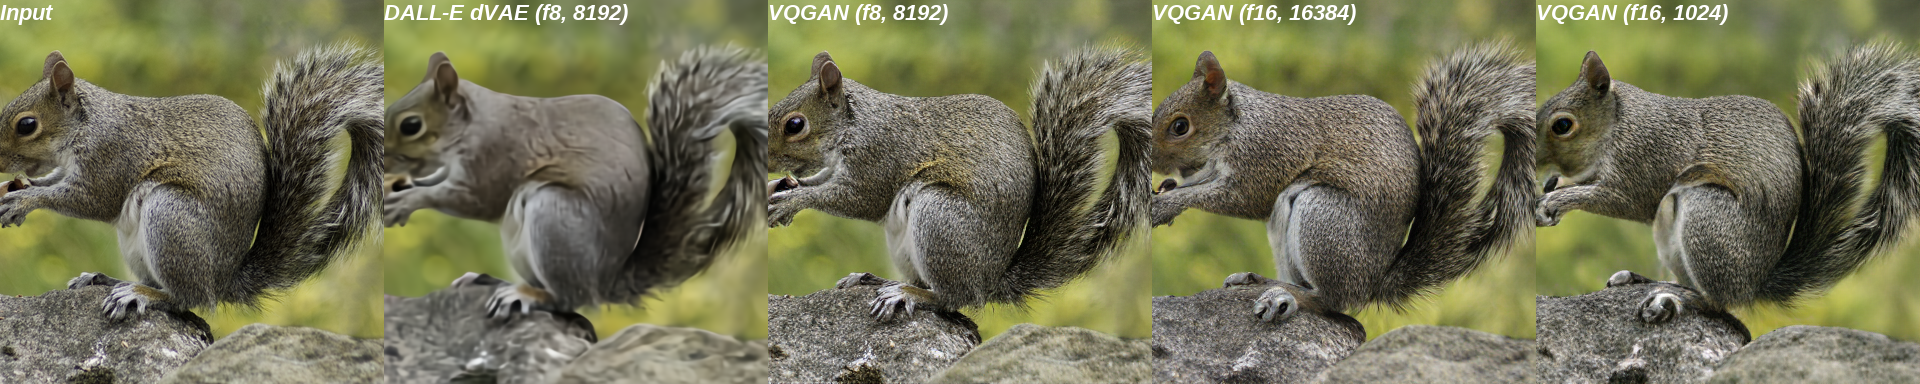

In [19]:
pil_im = Image.open('rtest1.png')
display(pil_im)

In [ ]:
pil_im = Image.open('rtest2.png')
display(pil_im)

In [ ]:
pil_im = Image.open('rtest3.png')
display(pil_im)

## 5b. Run additional sample tests within the enivornment - local file tests

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample1.png -output test1.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample2.png -output test2.png)

In [ ]:
!(source conda_envs/bin/activate; python twc_main.py -input twc_samples/sample3.png -output test3.png)

In [ ]:
pil_im = Image.open('test1.png')
display(pil_im)

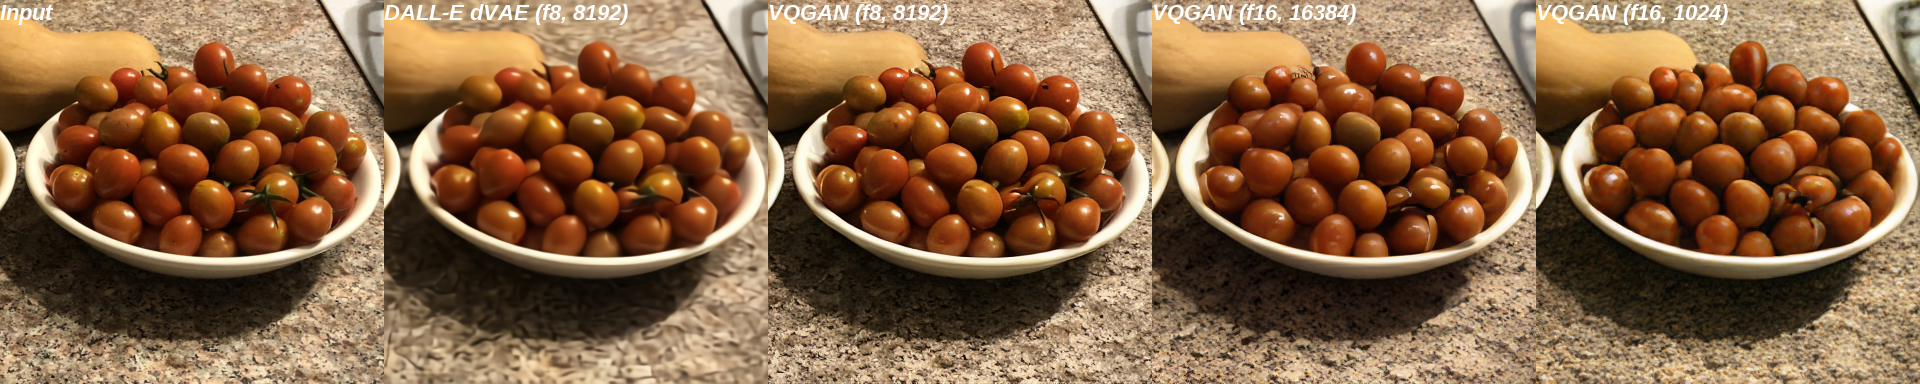

In [ ]:
pil_im = Image.open('test2.png')
display(pil_im)

In [ ]:
pil_im = Image.open('test3.png')
display(pil_im)